In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Description

Problem statement:
   
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees.

About HR Analytics:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

How does Attrition Affect companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [163]:
dfn = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [154]:
df1 = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [13]:
pd.set_option('display.max_columns', None)

In [164]:
dfn

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [11]:
categorical_features = ["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole",
                        "MaritalStatus","Over18","OverTime"]

In [165]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Categorical_features:
    
    "Attrition","BusinessTravel","Department","EducationField","Gender","JobRole",
    "MaritalStatus","Over18","OverTime"

Target Feature : "Attrition"

In [166]:
dfn.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observation:

In [19]:
dfn.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Null values in the features

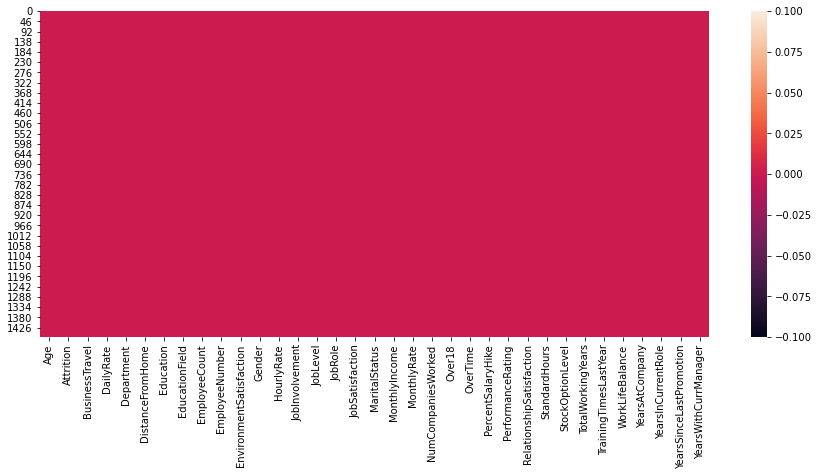

In [24]:
plt.figure(figsize = [15,6])
sns.heatmap(dfn.isnull())

Since there are no white spots or boxes(respresent null values) present in the graph.therefore,No null values are present in any of the feature.

In [21]:
dfn.shape

(1470, 35)

The dataset contains :
1. Number of columns = 35
2. number of rows    = 1470

#### Analysis for continous features:

In [167]:
dfn.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [27]:
print("Observations: \n")
for i in dfn.describe():
    print("Mean of the ",i,"is :", round(dfn[i].mean(),3))
    print("Median of the ",i,"is :",round(dfn[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(dfn[i].std(),3))
    print("Minimum value of ",i,"is :", round(dfn[i].min(),3))
    print("75th Quantile of ",i,"is :", round(dfn[i].quantile(0.75),3))
    print("Maximum value of ",i,"is :", round(dfn[i].max(),3))
    
    print("\n\n")

Observations: 

Mean of the  Age is : 36.924
Median of the  Age is : 36.0
Standard deviation of  Age is : 9.135
Minimum value of  Age is : 18
75th Quantile of  Age is : 43.0
Maximum value of  Age is : 60



Mean of the  DailyRate is : 802.486
Median of the  DailyRate is : 802.0
Standard deviation of  DailyRate is : 403.509
Minimum value of  DailyRate is : 102
75th Quantile of  DailyRate is : 1157.0
Maximum value of  DailyRate is : 1499



Mean of the  DistanceFromHome is : 9.193
Median of the  DistanceFromHome is : 7.0
Standard deviation of  DistanceFromHome is : 8.107
Minimum value of  DistanceFromHome is : 1
75th Quantile of  DistanceFromHome is : 14.0
Maximum value of  DistanceFromHome is : 29



Mean of the  Education is : 2.913
Median of the  Education is : 3.0
Standard deviation of  Education is : 1.024
Minimum value of  Education is : 1
75th Quantile of  Education is : 4.0
Maximum value of  Education is : 5



Mean of the  EmployeeCount is : 1.0
Median of the  EmployeeCount is :

#### Categorical Variable analysis

In [28]:
categorical_features = ["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole",
                        "MaritalStatus","Over18","OverTime"]

In [48]:
for i in categorical_features:
    print("Unique Values for",i,"are : \n\n ",dfn[i].unique(), "\n\n There counts are : \n\n",dfn[i].value_counts())
    print("\n")

Unique Values for Attrition are : 

  ['Yes' 'No'] 

 There counts are : 

 No     1233
Yes     237
Name: Attrition, dtype: int64


Unique Values for BusinessTravel are : 

  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

 There counts are : 

 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Unique Values for Department are : 

  ['Sales' 'Research & Development' 'Human Resources'] 

 There counts are : 

 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Unique Values for EducationField are : 

  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

 There counts are : 

 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Unique Values for Gender are : 

  ['Female' 'Male'] 

 The

In [49]:
#using visualization

In [50]:
# plotting indivisually

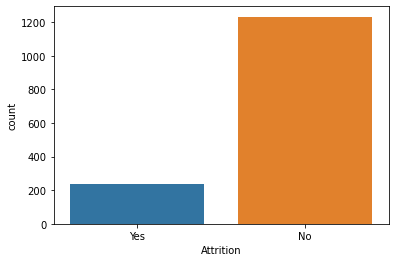

In [51]:
sns.countplot(dfn['Attrition'])

Observation :   #class imbalance

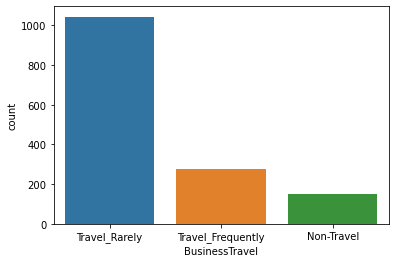

In [54]:
sns.countplot(dfn['BusinessTravel'])

observation : 

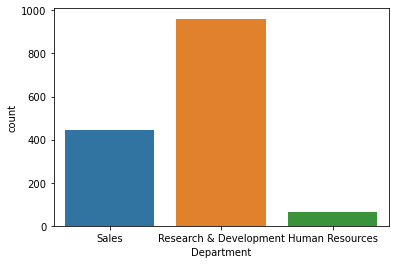

In [168]:
sns.countplot(dfn['Department'])

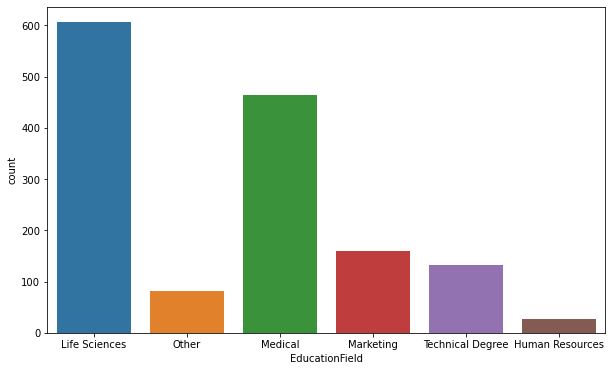

In [59]:
plt.figure(figsize = [10,6])
sns.countplot(dfn['EducationField'])

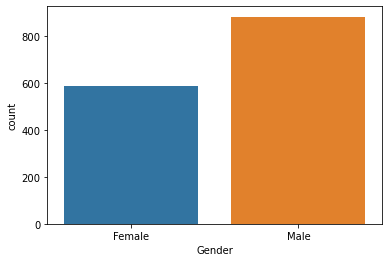

In [60]:
sns.countplot(dfn['Gender'])

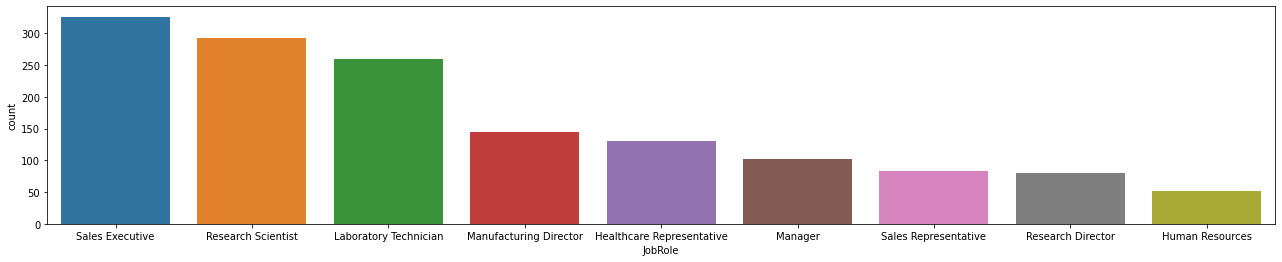

In [66]:
plt.figure(figsize = [22,4])
sns.countplot(dfn['JobRole'])

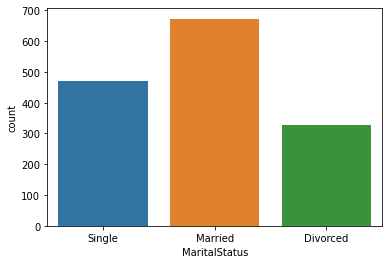

In [67]:
sns.countplot(dfn['MaritalStatus'])

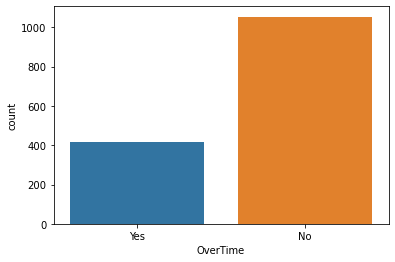

In [68]:
sns.countplot(dfn['OverTime'])

In [70]:
#converting the categorical variables with the help of label encoder

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
for i in categorical_features:
    df[i] = le.fit_transform(df[i])

In [74]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


In [75]:
#checking outliers

In [77]:
numeric_variable = df.drop(["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole",
                        "MaritalStatus","Over18","OverTime"],axis = 1)

In [78]:
numeric_variable

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [80]:
#plotting boxplot indivsually

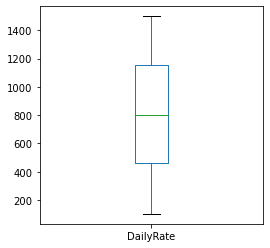

In [86]:
plt.figure(figsize = [4,4])
numeric_variable["DailyRate"].plot.box()

no outliers present

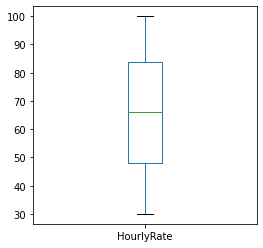

In [84]:
plt.figure(figsize = [4,4])
numeric_variable["HourlyRate"].plot.box()

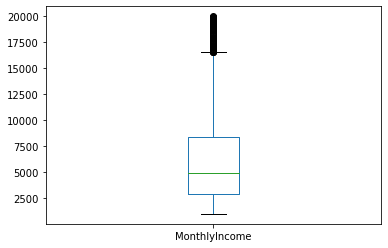

In [89]:
numeric_variable["MonthlyIncome"].plot.box()

Outliers are present very near to the whiskers and some are far from it

will be removing it in further steps

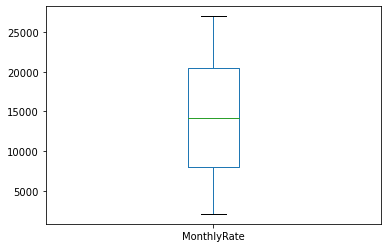

In [90]:
numeric_variable["MonthlyRate"].plot.box()

no outliers are present

## outliers removal

In [91]:
from scipy.stats import zscore

In [117]:
#interquantile

In [176]:
Q1 = df1["MonthlyIncome"].quantile(0.25)
Q1

2911.0

In [175]:
Q3 = df["MonthlyIncome"].quantile(0.75)
Q3

8379.0

In [177]:
IQR  = Q3 -Q1
IQR

5468.0

In [178]:
lower_limit = Q1 - 1.5*IQR
lower_limit

-5291.0

In [179]:
upper_limit = Q3 + 1.5*IQR
upper_limit

16581.0

In [180]:
df_new2 = df[(df["MonthlyIncome"]>lower_limit)&(df["MonthlyIncome"]<upper_limit)]

In [181]:
df_new2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


In [183]:
df_new2.shape

(1356, 35)

In [184]:
df.shape

(1470, 35)

In [188]:
data_lose = ((df.shape[0] - df_new2.shape[0])/df.shape[0])*100
data_lose

7.755102040816326

7.75 Data lost which is small so we can remove the outliers

In [189]:
df1 = df_new2

In [190]:
#using visuals

In [200]:
continous_data = df1[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EnvironmentSatisfaction","HourlyRate","JobInvolvement",
                   "JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction",
                   "StandardHours","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
                   "YearsSinceLastPromotion","YearsWithCurrManager"]]

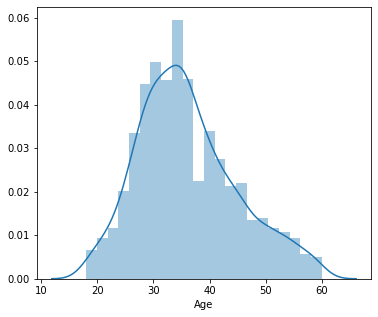

Observation : 
Age is right skewed


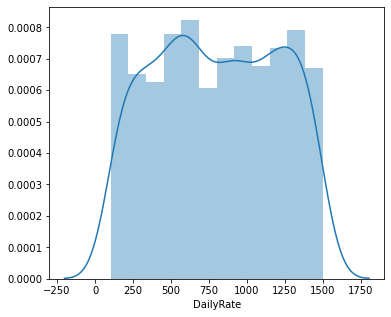

Observation : 
Data is highly spreaded.


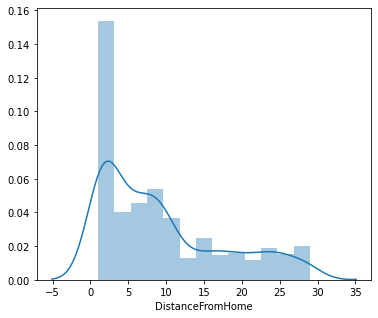

Observation : 
Right skewed data


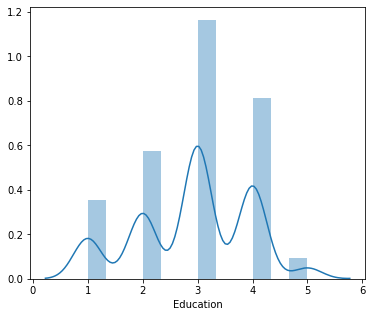

Observation : 
the data is concentrated on on the given values.


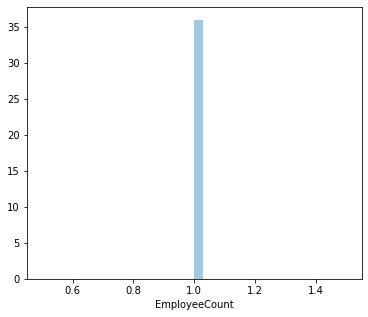

Observation : 
remains 1 for all the observations


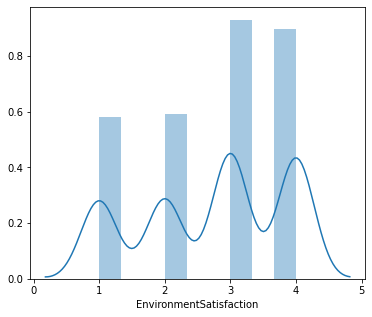

Observation : 
the data is concentrated on on the given values


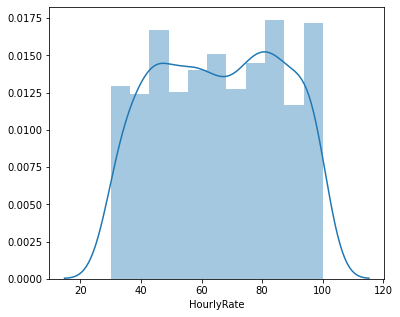

Observation : 
Data is highly spreaded.


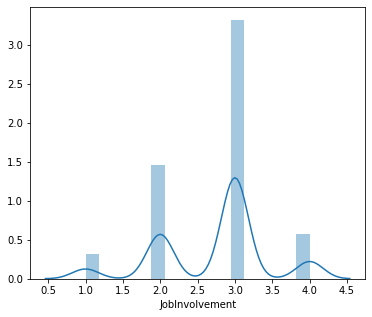

Observation : 
the data is concentrated on on the given values


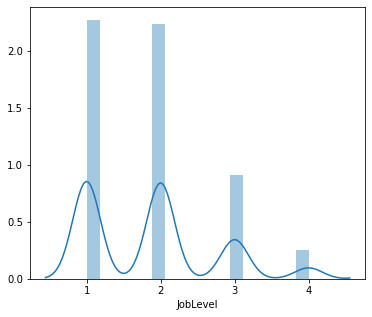

Observation : 
the data is concentrated on on the given values


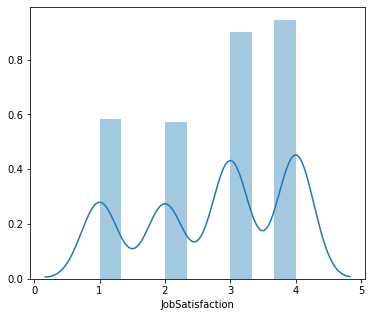

Observation : 
the data is concentrated on on the given values


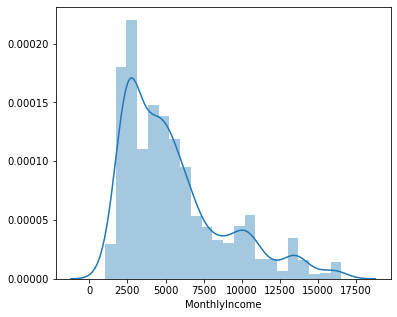

Observation : 
Data is right skewed.


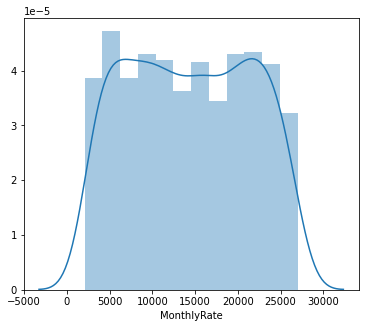

Observation : 
Data is highly spreaded.


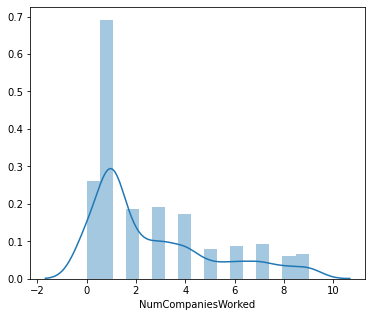

Observation : 
Data is right skewed.


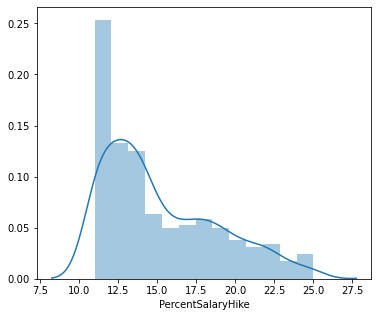

Observation : 
Data is right skewed


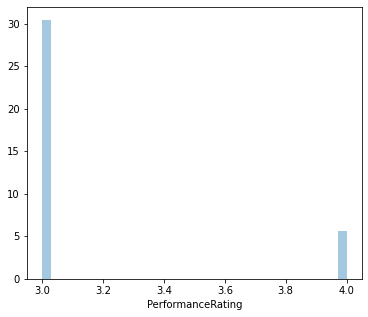

Observation : 
The values are either 3 or 4.


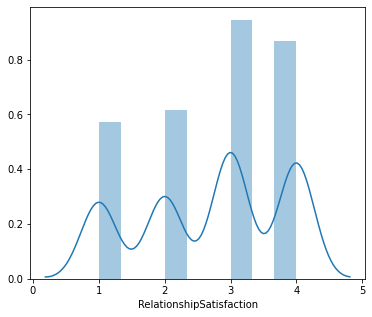

Observation : 
the data is concentrated on on the given values


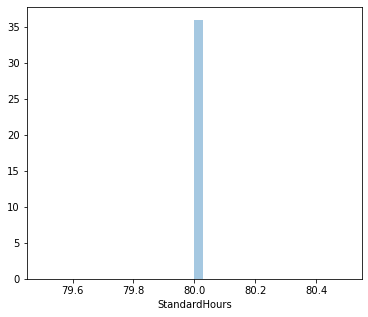

Observation : 
remains 80 for all the observations


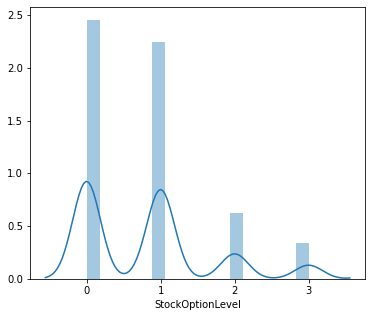

Observation : 
the data is concentrated on on the given values


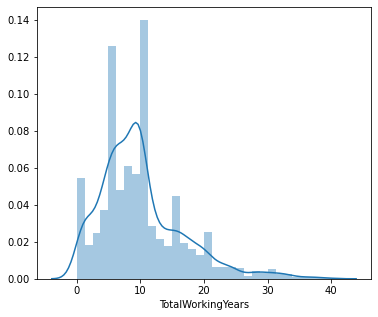

Observation : 
Not equally distributed. A little bit right skewed


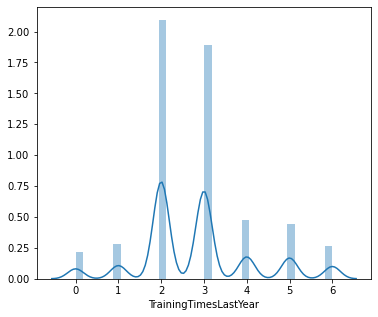

Observation : 
the data is concentrated on on the given values


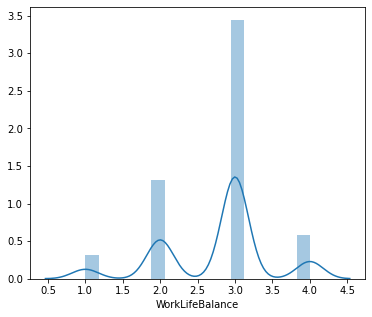

Observation : 
the data is concentrated on on the given values


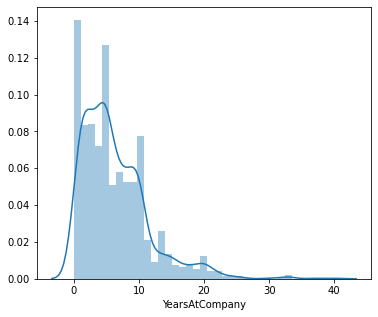

Observation : 
Right skewed data.


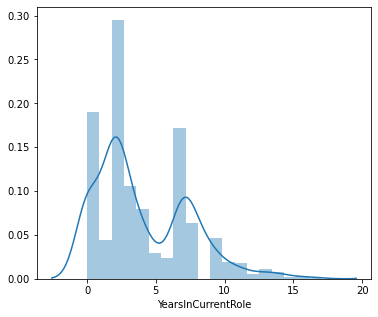

Observation : 
unequal distribution.


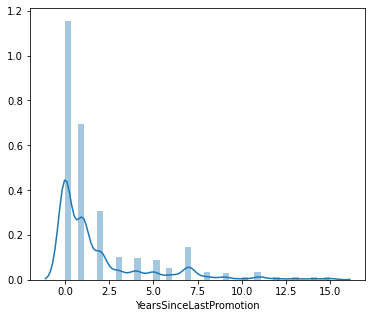

Observation : 
unequal distribution.Right skewed


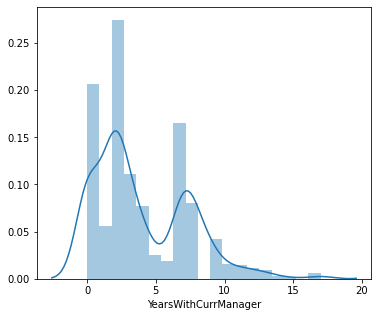

Observation : 
unequal distribution


In [203]:
for i in continous_data:
    plt.figure(figsize = [6,5])
    plt.xlabel(i)
    sns.distplot(continous_data[[i]],kde = True)
    plt.show()
    x = input("Observation : \n")

In [218]:
Scatter_plot = df1[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

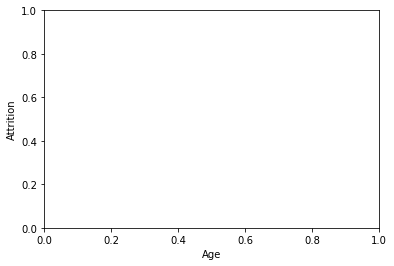

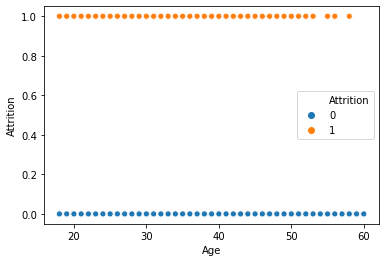

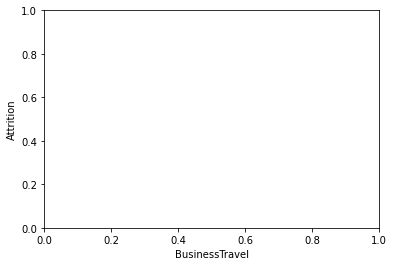

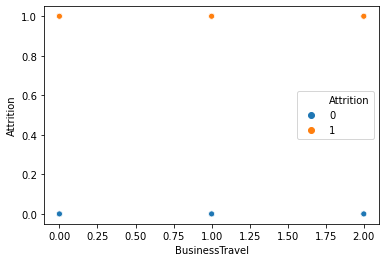

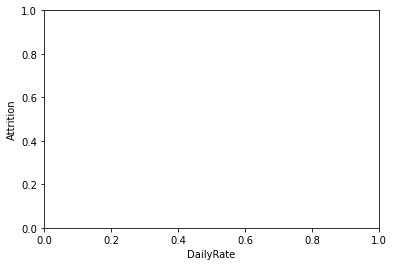

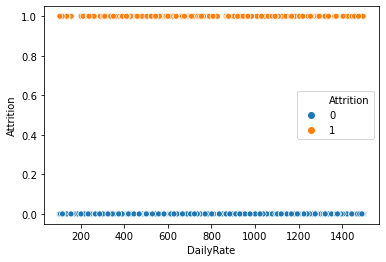

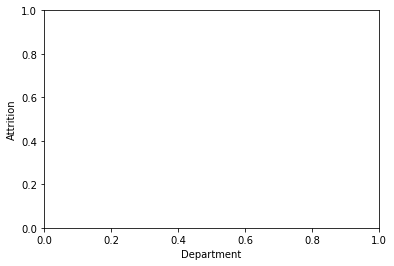

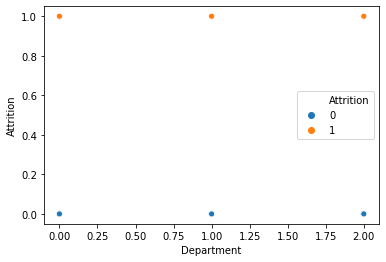

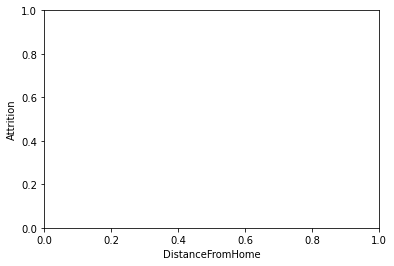

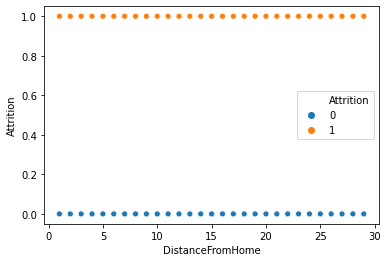

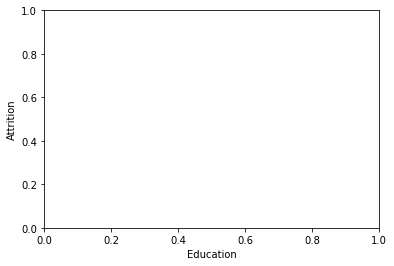

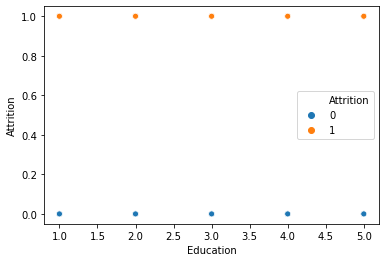

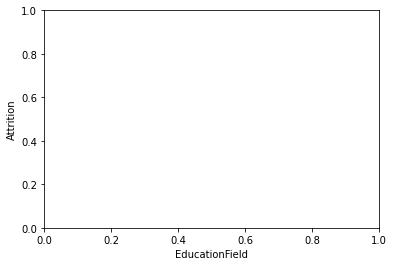

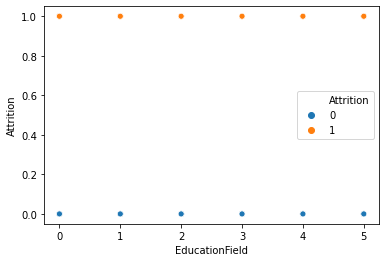

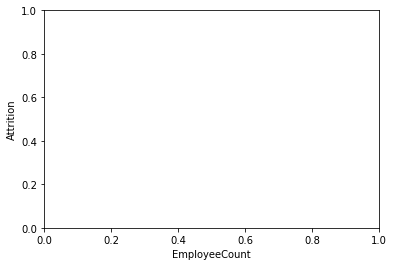

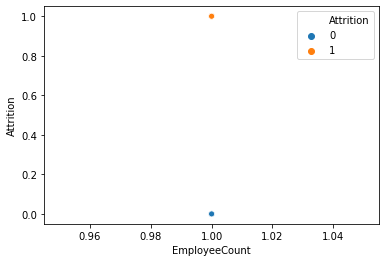

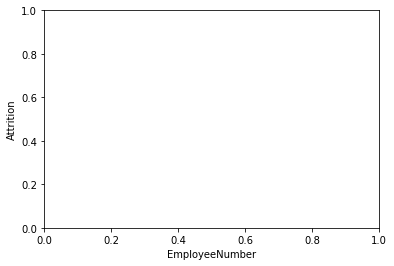

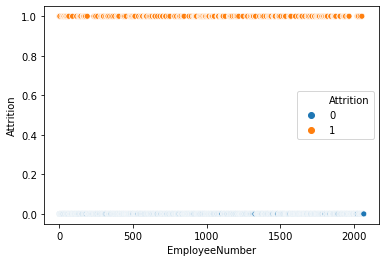

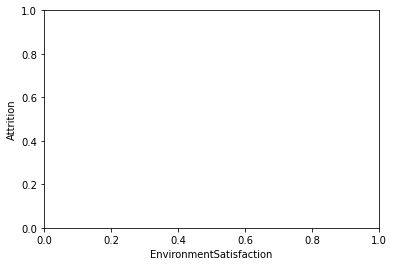

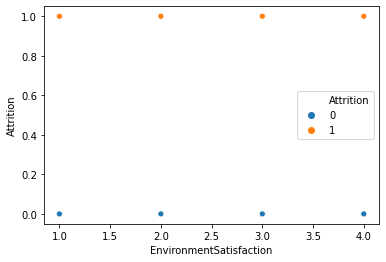

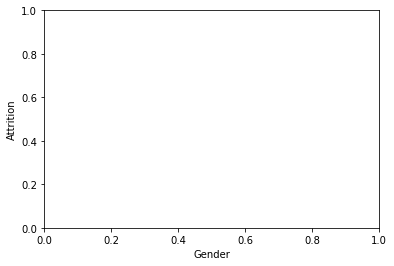

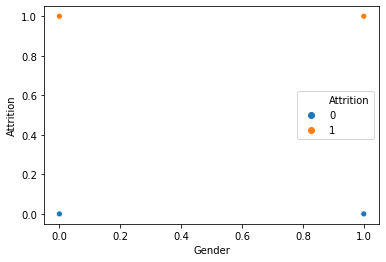

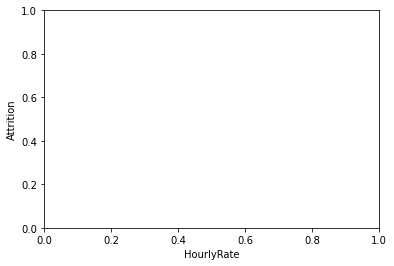

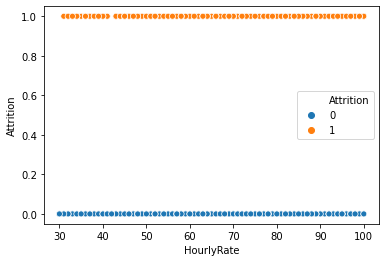

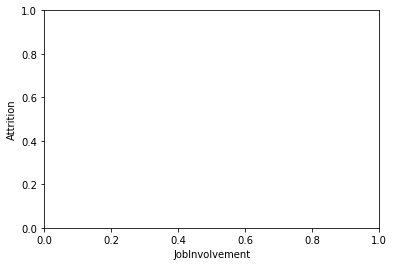

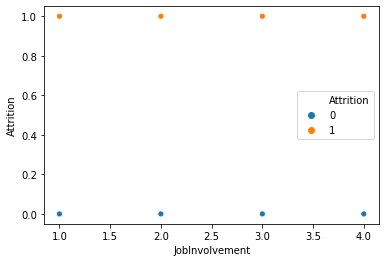

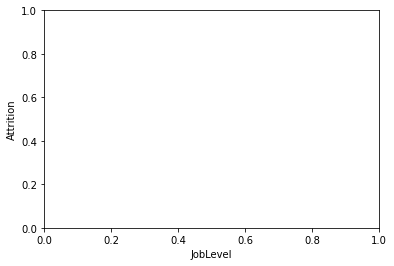

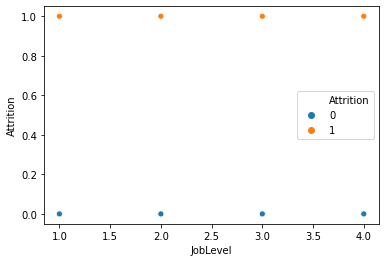

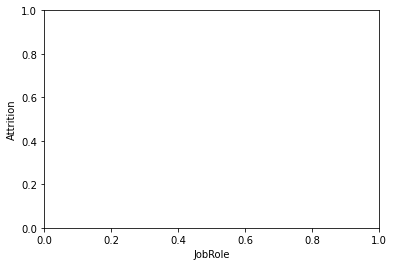

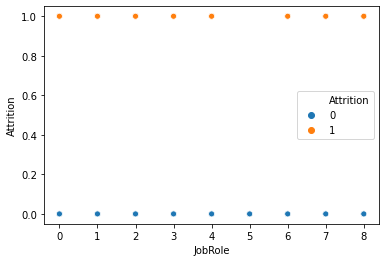

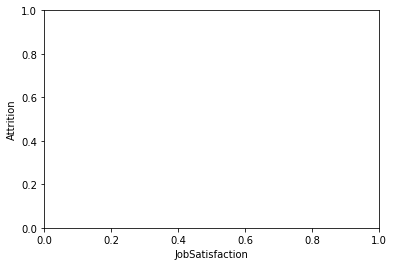

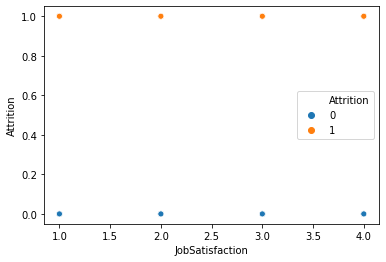

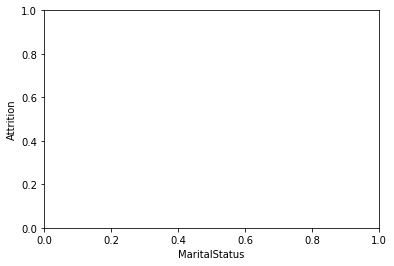

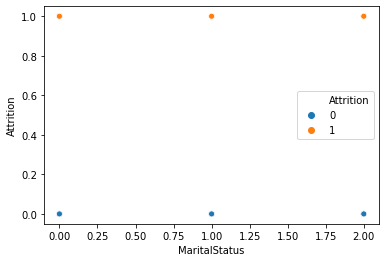

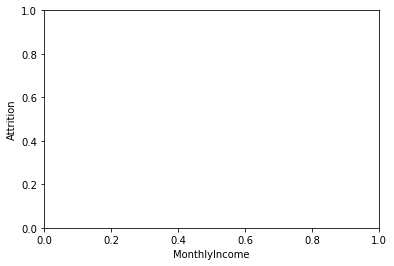

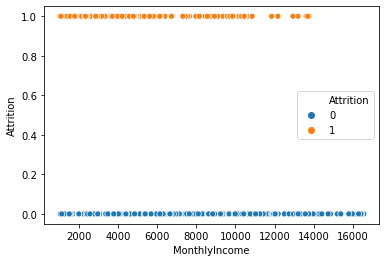

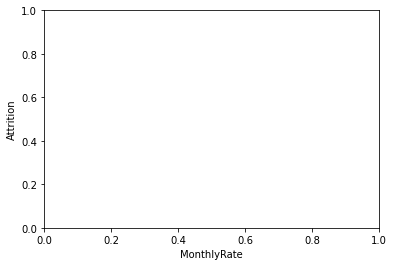

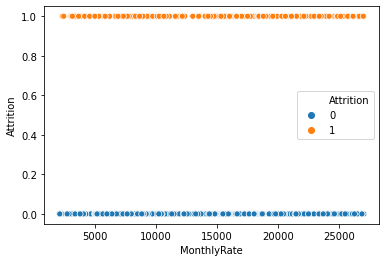

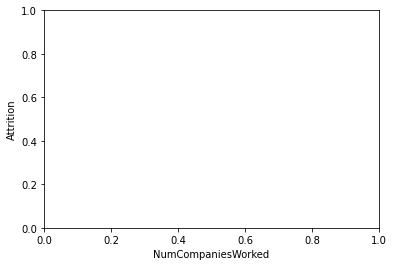

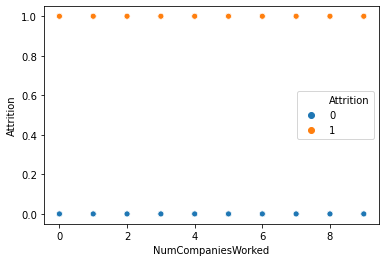

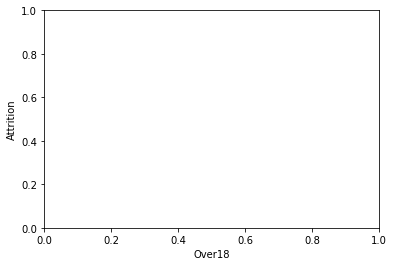

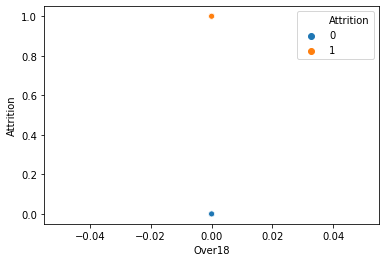

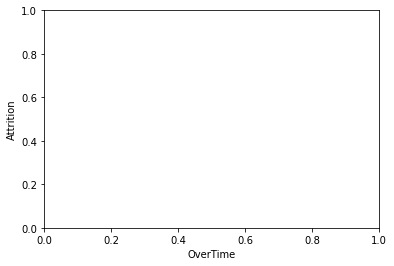

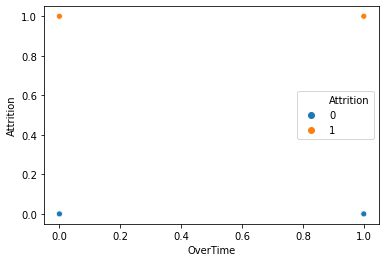

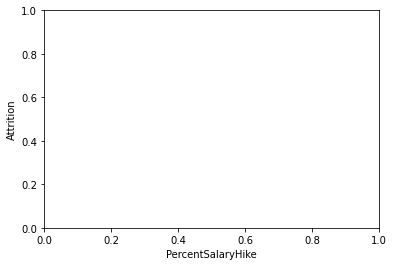

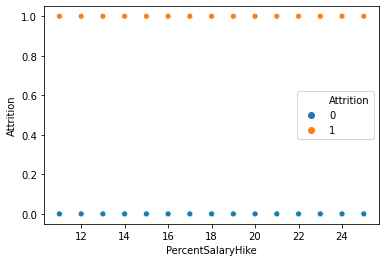

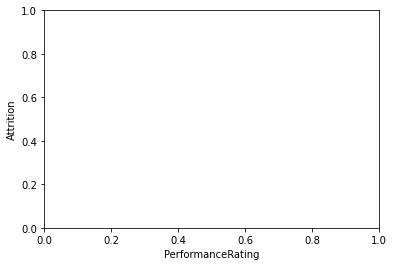

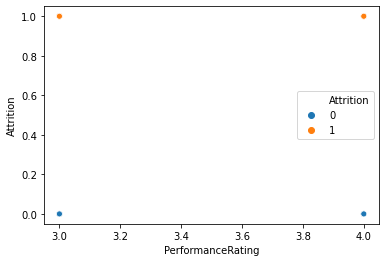

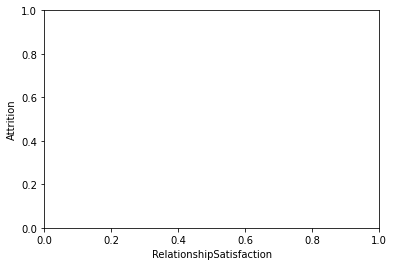

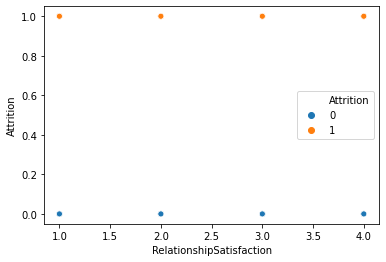

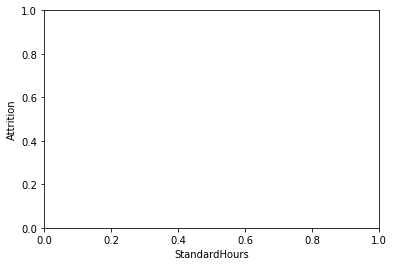

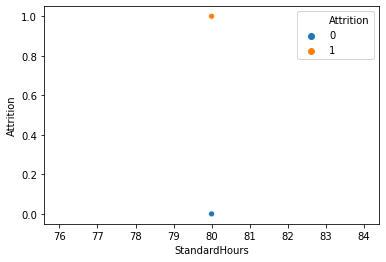

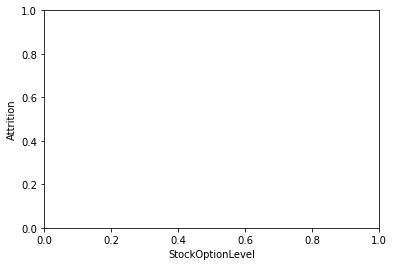

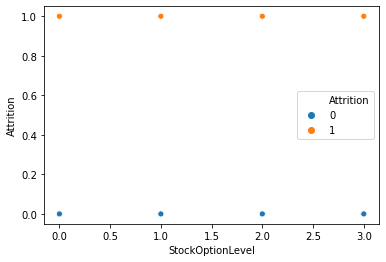

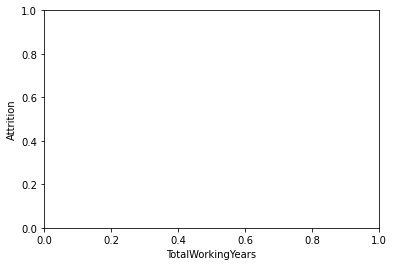

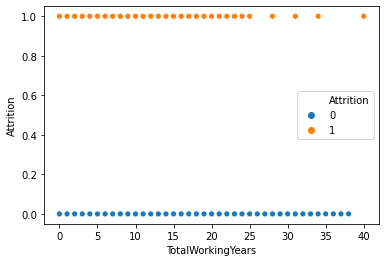

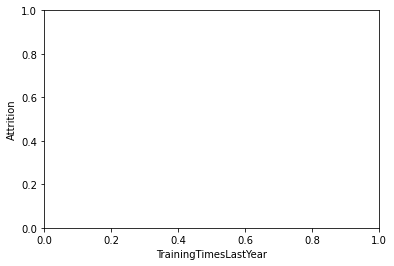

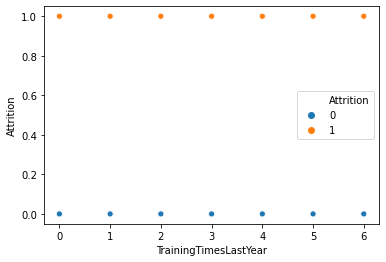

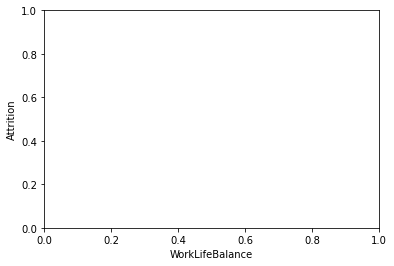

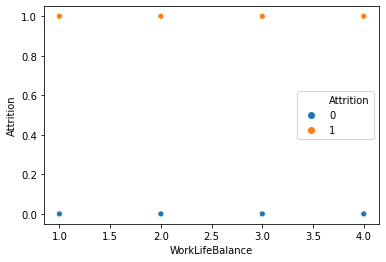

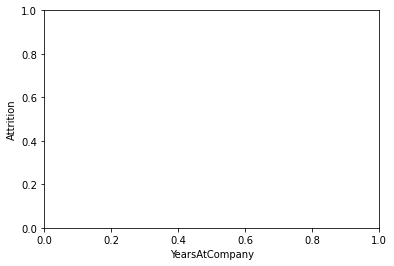

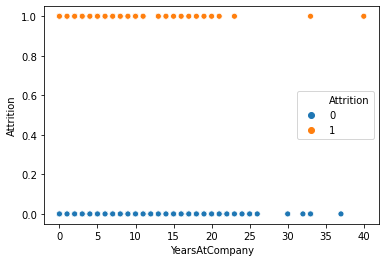

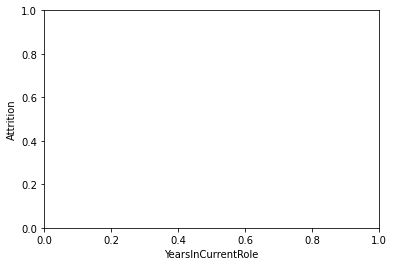

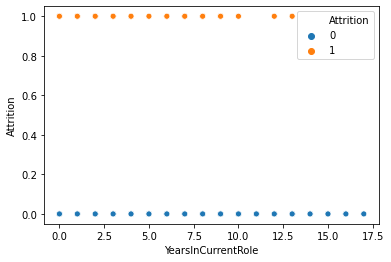

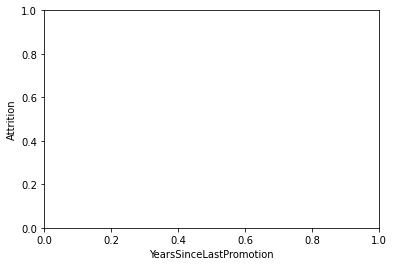

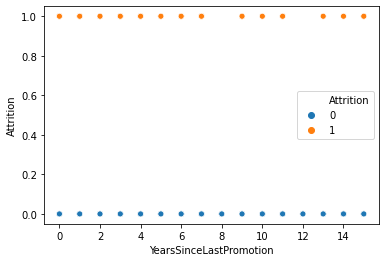

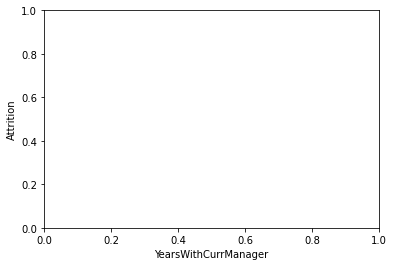

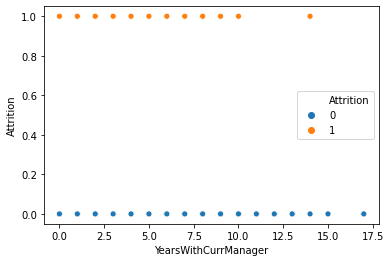

In [220]:
for i in Scatter_plot:
    x = Scatter_plot[i]
    y = df1["Attrition"]
    plt.xlabel(i)
    plt.ylabel("Attrition")
    plt.figure(figsize = [6,4])
    sns.scatterplot(x,y,hue = df1['Attrition'])
    plt.show()

Observation:
1. People with jobe role 5 had not a left the job.
2. people with monthly income more than 14000 had not left the job
3. Number of people who has spent more than 25 years in the company shows very less attrition.
4. People who has spend more than 12.5 years in there job has not left the company.

In [221]:
#Checking correlation
corr_matrix = df.corr()

In [223]:
#since huge number of features are present well not plot heatmap

In [224]:
corr_d = pd.DataFrame(corr_matrix)

In [343]:
corr_d

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


1. the features shows corr equalss or more than +/- 5 is highly corelated in positivly and negatively respectively- category1.
2. features shows corr less than +5 but more than +1 some what correlated to each other - category2.
3. Between -1 to 1 almost no-co relation - category 0.
4. features shows corr more than -5 but less than 1 some what correlated to each other negatively - cataegory3 .

observation:
1. 
    Job level and age
    Monthly income andjob level (0.950300)
    stock option level and marital status(-0.662577)
    Monthly income and years at company(0.514285)
    Monthly income and total working years(0.772893)
    job level and total working years(0.782208)
    year at company and job level(0.534739). lies in category1

2. Most of the features shows relation between -1 and 1.

In [236]:
#checking relationship with target feature

In [250]:
corr=corr_matrix['Attrition'].sort_values(ascending = False)
corr = pd.DataFrame(corr)
corr

,Attrition
Attrition,1.000000
OverTime,0.246118
MaritalStatus,0.162070
DistanceFromHome,0.077924
JobRole,0.067151
Department,0.063991
NumCompaniesWorked,0.043494
Gender,0.029453
EducationField,0.026846
MonthlyRate,0.015170


1. Over time and marital status shows some positive correlation,but very less.
2. performance rating ,business travel and hourly rates shows almost no correlation with values tending to zero.
3. Other features show very les correlation.
4. EmployeeCount,Over18 and Standard hours have no relation.

In [252]:
#Using all the rows for model building

In [285]:
#spliting the data n x and y 

In [348]:
x7 = df1.drop(["Attrition"],axis = 1)

In [349]:
x7.skew()

Age                         0.530363
BusinessTravel             -1.414309
DailyRate                  -0.002620
Department                  0.177663
DistanceFromHome            0.924153
Education                  -0.294718
EducationField              0.558655
EmployeeCount               0.000000
EmployeeNumber              0.011366
EnvironmentSatisfaction    -0.313239
Gender                     -0.400547
HourlyRate                 -0.035856
JobInvolvement             -0.482038
JobLevel                    0.733344
JobRole                    -0.418752
JobSatisfaction            -0.337053
MaritalStatus              -0.167340
MonthlyIncome               1.194390
MonthlyRate                 0.019849
NumCompaniesWorked          1.067176
Over18                      0.000000
OverTime                    0.955464
PercentSalaryHike           0.797353
PerformanceRating           1.910094
RelationshipSatisfaction   -0.294784
StandardHours               0.000000
StockOptionLevel            0.964807
T

In [350]:
x7

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


In [280]:
y = df1["Attrition"]

In [258]:
y.shape

(1356,)

In [259]:
#removing skewness

In [351]:
remove_skew_power = df1[["DistanceFromHome","NumCompaniesWorked",
                   "TotalWorkingYears","WorkLifeBalance","YearsAtCompany",
                   "YearsSinceLastPromotion"]]

In [352]:
remove_skew_boxcox = df1[["Age","JobLevel","PercentSalaryHike","StockOptionLevel","TrainingTimesLastYear","YearsInCurrentRole"
                         ,"YearsWithCurrManager","MonthlyIncome","OverTime","PerformanceRating"]]

In [353]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
for i in remove_skew_power:
    x7[i] = power.fit_transform(remove_skew_power[[i]])

In [354]:
x7.skew()

Age                         0.530363
BusinessTravel             -1.414309
DailyRate                  -0.002620
Department                  0.177663
DistanceFromHome           -0.017187
Education                  -0.294718
EducationField              0.558655
EmployeeCount               0.000000
EmployeeNumber              0.011366
EnvironmentSatisfaction    -0.313239
Gender                     -0.400547
HourlyRate                 -0.035856
JobInvolvement             -0.482038
JobLevel                    0.733344
JobRole                    -0.418752
JobSatisfaction            -0.337053
MaritalStatus              -0.167340
MonthlyIncome               1.194390
MonthlyRate                 0.019849
NumCompaniesWorked          0.020780
Over18                      0.000000
OverTime                    0.955464
PercentSalaryHike           0.797353
PerformanceRating           1.910094
RelationshipSatisfaction   -0.294784
StandardHours               0.000000
StockOptionLevel            0.964807
T

In [305]:
#applying boxcox indivisually

In [306]:
from scipy.stats import boxcox

In [356]:
x7["Age"] = boxcox(x7["Age"],0)
x7["Age"].skew()

-0.08270003454542771

In [357]:
x7["JobLevel"] = boxcox(x7["JobLevel"],0)
x7["JobLevel"].skew()

0.11793024218614634

In [358]:
x7["PercentSalaryHike"] = boxcox(x7["PercentSalaryHike"],0)
x7["PercentSalaryHike"].skew()

0.47194767936678467

In [359]:
x7["StockOptionLevel"] = power.fit_transform(x7[["StockOptionLevel"]])

In [360]:
x7["StockOptionLevel"].skew()

0.09365710089248036

In [361]:
x7["TrainingTimesLastYear"] = power.fit_transform(x7[["TrainingTimesLastYear"]])
x7["TrainingTimesLastYear"].skew()

0.05664574265728913

In [362]:
x7["YearsInCurrentRole"] = power.fit_transform(x7[["YearsInCurrentRole"]])
x7["YearsInCurrentRole"].skew()

-0.06265907043537851

In [363]:
x7["YearsWithCurrManager"] = power.fit_transform(x7[["YearsWithCurrManager"]])
x7["YearsWithCurrManager"].skew()

-0.06201704138168059

In [364]:
x7["MonthlyIncome"] = boxcox(x7["MonthlyIncome"],0)
x7["MonthlyIncome"].skew()

0.13803246248305964

In [365]:
x7["OverTime"].skew()

0.9554636201101153

In [382]:
x7["PerformanceRating"] = power.fit_transform(x7[["PerformanceRating"]])
x7["PerformanceRating"].skew()

1.9100939129171803

In [385]:
x7.skew()

Age                        -0.082700
BusinessTravel             -1.414309
DailyRate                  -0.002620
Department                  0.177663
DistanceFromHome           -0.017187
Education                  -0.294718
EducationField              0.558655
EmployeeCount               0.000000
EmployeeNumber              0.011366
EnvironmentSatisfaction    -0.313239
Gender                     -0.400547
HourlyRate                 -0.035856
JobInvolvement             -0.482038
JobLevel                    0.117930
JobRole                    -0.418752
JobSatisfaction            -0.337053
MaritalStatus              -0.167340
MonthlyIncome               0.138032
MonthlyRate                 0.019849
NumCompaniesWorked          0.020780
Over18                      0.000000
OverTime                    0.955464
PercentSalaryHike           0.471948
PerformanceRating           1.910094
RelationshipSatisfaction   -0.294784
StandardHours               0.000000
StockOptionLevel            0.093657
T

In [386]:
#normalizing data

In [387]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for i in continous_data:
    x7[i]= ms.fit_transform(x7[[i]])

In [388]:
x7

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.683737,2,0.715820,2,0.000000,0.25,1,0.0,1,0.333333,0,0.914286,0.666667,0.500000,7,1.000000,2,0.636814,0.698053,0.959215,0,1,0.000000,0.0,0.000000,0.0,0.000000,0.436488,0.000000,0.000000,0.445717,0.465749,0.000000,0.539205
1,0.831787,1,0.126700,1,0.538666,0.00,1,0.0,2,0.666667,1,0.442857,0.333333,0.500000,6,0.333333,1,0.581238,0.916001,0.326250,0,0,0.898437,1.0,1.000000,0.0,0.573271,0.495304,0.579624,0.582747,0.572043,0.641868,0.423763,0.648719
2,0.598474,2,0.909807,1,0.141250,0.25,4,0.0,4,1.000000,1,0.885714,0.333333,0.000000,2,0.666667,2,0.260284,0.012126,0.860133,0,1,0.377786,0.0,0.333333,0.0,0.000000,0.403811,0.579624,0.582747,0.000000,0.000000,0.000000,0.000000
3,0.503446,1,0.923407,1,0.243218,0.75,1,0.0,5,1.000000,0,0.371429,0.666667,0.000000,6,0.666667,1,0.378468,0.845814,0.326250,0,1,0.000000,0.0,0.666667,0.0,0.000000,0.436488,0.579624,0.582747,0.514761,0.641868,0.700711,0.000000
4,0.336773,2,0.350036,1,0.141250,0.00,3,0.0,7,0.000000,1,0.142857,0.666667,0.000000,2,0.333333,1,0.441293,0.583738,1.000000,0,0,0.105985,0.0,1.000000,0.0,0.573271,0.368331,0.579624,0.582747,0.233476,0.296791,0.599843,0.303604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.575717,1,0.559771,1,0.912388,0.25,3,0.0,2061,0.666667,1,0.157143,1.000000,0.500000,2,1.000000,1,0.334320,0.409396,0.723412,0,0,0.530242,0.0,0.666667,0.0,0.573271,0.658082,0.579624,0.582747,0.404800,0.296791,0.000000,0.396795
1466,0.642199,2,0.365784,1,0.445821,0.00,3,0.0,2062,1.000000,1,0.171429,0.333333,0.792481,0,0.000000,1,0.819495,0.777474,0.723412,0,0,0.377786,0.0,0.000000,0.0,0.573271,0.466862,0.869074,0.582747,0.482036,0.641868,0.423763,0.648719
1467,0.336773,2,0.037938,1,0.323326,0.50,1,0.0,2064,0.333333,1,0.814286,1.000000,0.500000,4,0.333333,1,0.645592,0.123670,0.326250,0,1,0.728199,1.0,0.333333,0.0,0.573271,0.368331,0.000000,0.582747,0.445717,0.296791,0.000000,0.396795
1468,0.831787,1,0.659270,2,0.141250,0.50,3,0.0,2065,1.000000,1,0.471429,0.333333,0.500000,7,0.333333,1,0.598909,0.447661,0.506610,0,0,0.293749,0.0,1.000000,0.0,0.000000,0.658082,0.579624,0.248437,0.544593,0.589670,0.000000,0.695716


In [389]:
#balancing data set

In [390]:
from imblearn.combine import SMOTETomek

In [392]:
from collections import Counter
os = SMOTETomek()

x_ns,y_ns = os.fit_resample(x7,y)
print("The Number of classes before fit {} ".format(Counter(y)))
print("The Number of classes After fit {} ".format(Counter(y_ns)))

The Number of classes before fit Counter({0: 1124, 1: 232}) 
The Number of classes After fit Counter({1: 1039, 0: 1039}) 


#we can use smote

In [393]:
x_ns.shape

(2078, 34)

In [394]:
y_ns.shape

(2078,)

In [396]:
#for random_state check
from sklearn.linear_model import LogisticRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x_ns,y_ns,test_size =.20,random_state = i)
    le = LogisticRegression()
    le.fit(x_train,y_train)
    prdle =le.predict(x_test)
    accu = accuracy_score(y_test,prdle)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.7764423076923077 at random state :  13


In [397]:
x_train, x_test, y_train, y_test = train_test_split(x_ns,y_ns,test_size =.20,random_state = 13)

In [398]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print(accuracy_score(y_test,prdlr))
print(confusion_matrix(y_test,prdlr))
print(classification_report(y_test,prdlr))

0.7764423076923077
[[163  50]
 [ 43 160]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       213
           1       0.76      0.79      0.77       203

    accuracy                           0.78       416
   macro avg       0.78      0.78      0.78       416
weighted avg       0.78      0.78      0.78       416



.so we can see that by using SMOTETomek we have balanced our data. the f1 score of the model is equal for both defaulters and non defaulters.which means both theclasses are well balanced and no biasness is presnet in the model.also the positives or precision of the model is good so we can proceed with it.

In [399]:
#model building

In [400]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print(accuracy_score(y_test,prdlr))
print(confusion_matrix(y_test,prdlr))
print(classification_report(y_test,prdlr))

0.7764423076923077
[[163  50]
 [ 43 160]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       213
           1       0.76      0.79      0.77       203

    accuracy                           0.78       416
   macro avg       0.78      0.78      0.78       416
weighted avg       0.78      0.78      0.78       416



Observation: The accuracy of the model is 77.64 percent . 

The model Learning:
Precision value(positive predictive value) for 0 is 79% whereas the Precision value for 1 is 76% .And recall(sensitivity) for 0 is 77% and recall value for 1 is 79%. Which means the performance of the model is high.

In [404]:
from sklearn.metrics import roc_curve,roc_auc_score

In [405]:
y_pred_prob = lr.predict_proba(x_test)[:,1]

In [406]:
y_pred_prob

array([0.56526508, 0.17698244, 0.68221863, 0.42163928, 0.7414785 ,
       0.22401123, 0.15371375, 0.65986466, 0.55807253, 0.25757461,
       0.55294527, 0.03087724, 0.44119293, 0.53859474, 0.51957447,
       0.43225602, 0.37498268, 0.72807984, 0.42157842, 0.6992302 ,
       0.35377539, 0.29586454, 0.22724282, 0.921621  , 0.83235855,
       0.35963673, 0.22089816, 0.17168607, 0.55183093, 0.08073085,
       0.36470352, 0.90502218, 0.44100877, 0.29055156, 0.61859939,
       0.70575528, 0.26504874, 0.70210734, 0.31806364, 0.26134645,
       0.81567621, 0.09496534, 0.80238131, 0.16383033, 0.59336838,
       0.61284306, 0.74142171, 0.78815507, 0.52989192, 0.649409  ,
       0.51918678, 0.81125959, 0.3040531 , 0.21260047, 0.409423  ,
       0.86136399, 0.27723268, 0.21225765, 0.11072173, 0.09350146,
       0.346745  , 0.53451552, 0.52759703, 0.67977365, 0.4257171 ,
       0.22431651, 0.3604814 , 0.54610796, 0.26895527, 0.60352614,
       0.42893076, 0.36379134, 0.58694863, 0.38202106, 0.19546

In [407]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

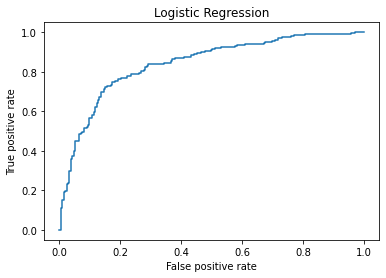

In [410]:
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

model is learning good as area under the curve is not very high.

In [401]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
prdrfc = rfc.predict(x_test)
print(accuracy_score(y_test,prdrfc))
print(confusion_matrix(y_test,prdrfc))
print(classification_report(y_test,prdrfc))

0.90625
[[206   7]
 [ 32 171]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       213
           1       0.96      0.84      0.90       203

    accuracy                           0.91       416
   macro avg       0.91      0.90      0.91       416
weighted avg       0.91      0.91      0.91       416



Observation: The accuracy of the model is 90.62 percent . 

The model Learning:
Precision value(positive predictive value) for 0 is 87% whereas the Precision value for 1 is 96% .And recall(sensitivity) for 0 is 97% and recall value for 1 is 84%. Which means the performance of the model is high.

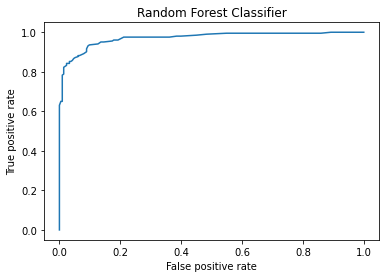

In [415]:
y_pred_prob = rfc.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label = 'Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

As we can see that area under the curve is more means model is learning efficiently.

In [402]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
prdsvc = svc.predict(x_test)
print(accuracy_score(y_test,prdsvc))
print(confusion_matrix(y_test,prdsvc))
print(classification_report(y_test,prdsvc))

0.5048076923076923
[[104 109]
 [ 97 106]]
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       213
           1       0.49      0.52      0.51       203

    accuracy                           0.50       416
   macro avg       0.51      0.51      0.50       416
weighted avg       0.51      0.50      0.50       416



Observation: The accuracy of the model is 50.48 percent .

The model Learning: Precision value(positive predictive value) for 0 is 52% whereas the Precision value for 1 is 49% .And recall(sensitivity) for 0 is 49% and recall value for 1 is 52%. Which means the performance of the model is average.

In [403]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print(accuracy_score(y_test,prdtc))
print(confusion_matrix(y_test,prdtc))
print(classification_report(y_test,prdtc))

0.8269230769230769
[[170  43]
 [ 29 174]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       213
           1       0.80      0.86      0.83       203

    accuracy                           0.83       416
   macro avg       0.83      0.83      0.83       416
weighted avg       0.83      0.83      0.83       416



Observation: The accuracy of the model is 82.69 percent .

The model Learning: Precision value(positive predictive value) for 0 is 85% whereas the Precision value for 1 is 80% .And recall(sensitivity) for 0 is 80% and recall value for 1 is 86%. Which means the performance of the model is good.

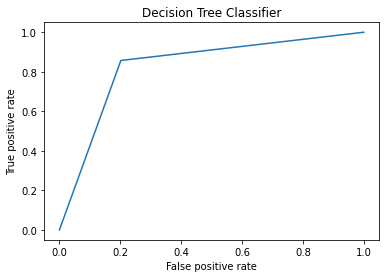

In [418]:
y_pred_prob = dtc.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label = 'Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

As we can see that area under the curve is more around 0.8 on true positive rate means model is learning efficiently.

In [419]:
#cross validation

In [422]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x_ns,y_ns,cv = 5)
print("Cross validation score of Logistic Regression is ",scr.mean())

Cross validation score of Logistic Regression is  0.6496512974976829


In [423]:
scr = cross_val_score(dtc,x_ns,y_ns,cv = 5)
print("Cross validation score of Decision tree classifier is ",scr.mean())

Cross validation score of Decision tree classifier is  0.6510866543095458


In [424]:
scr = cross_val_score(rfc,x_ns,y_ns,cv = 5)
print("Cross validation score of Random Forest classifier is ",scr.mean())

Cross validation score of Random Forest classifier is  0.8224015291936979


In [425]:
scr = cross_val_score(svc,x_ns,y_ns,cv = 5)
print("Cross validation score of Support vector classifier is ",scr.mean())

Cross validation score of Support vector classifier is  0.20114226135310473


Chosing Random forest classifier for model building.although it has slightly more difference between cross val score and accuracy score as compared to logistic regression but it has less false psitive value and True negative values

In [426]:
#Hyper parameter tuning

In [427]:
from sklearn.model_selection import GridSearchCV

In [428]:
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in GridSearchCV
parameters = {'max_depth' : np.arange(2,7),
             'criterion': ['gini','entropy']}    

In [429]:
GVC = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)

In [430]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6])})

In [431]:
GVC.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [432]:
mod = RandomForestClassifier(criterion = 'entropy',max_depth = 6,random_state = 13)
mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print("accuracy score of the model is :",accuracy_score(y_test,pred)*100)

accuracy score of the model is : 88.9423076923077


In [433]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[198  15]
 [ 31 172]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       213
           1       0.92      0.85      0.88       203

    accuracy                           0.89       416
   macro avg       0.89      0.89      0.89       416
weighted avg       0.89      0.89      0.89       416



In [434]:
#model testing

In [435]:
conclusion = pd.DataFrame([mod.predict(x_test)[:],prdtc[:]],index = ["predicted","original"])

In [436]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415
predicted,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0
original,0,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1


In [437]:
import joblib
joblib.dump(mod,"Hr_analytics.pkl")

['Hr_analytics.pkl']